<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-e422ba9ae95a>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


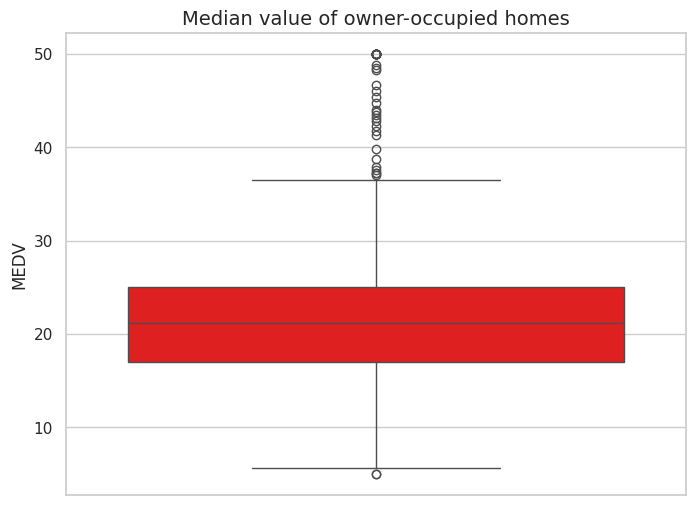

In [5]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(y='MEDV', data=boston_df, color="red")
plt.title("Median value of owner-occupied homes", fontsize=14)
plt.ylabel("MEDV", fontsize=12)
plt.show()

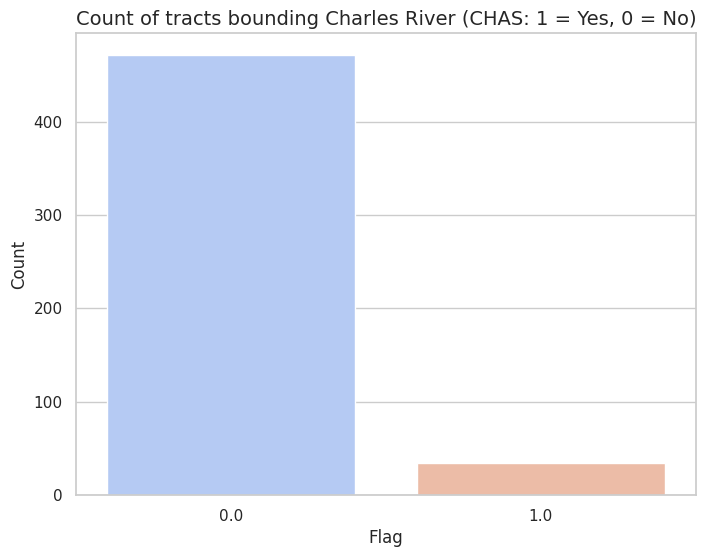

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='CHAS', hue='CHAS', data=boston_df, palette="coolwarm", legend=False)
plt.title("Count of tracts bounding Charles River (CHAS: 1 = Yes, 0 = No)", fontsize=14)
plt.xlabel("Flag", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

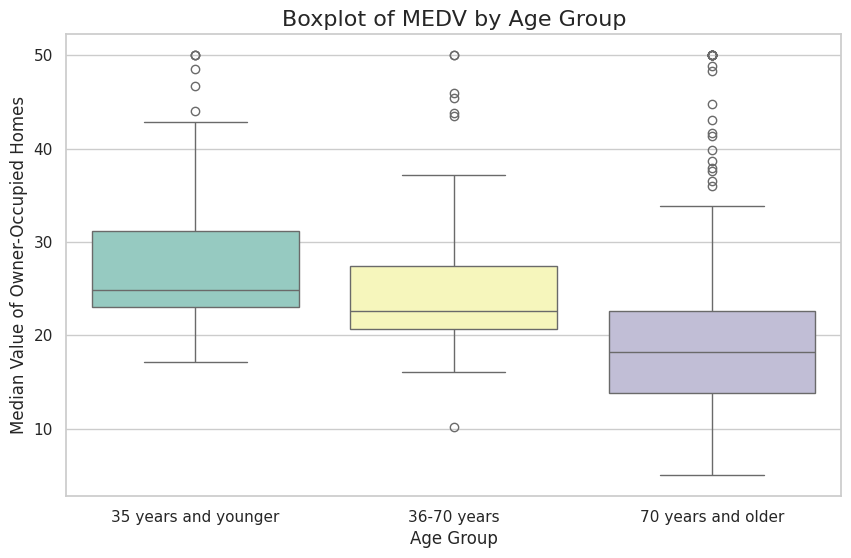

In [9]:
age_bins = [0, 35, 70, 100]
age_labels = ['35 years and younger', '36-70 years', '70 years and older']
boston_df['Age Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age Group', y='MEDV', data=boston_df, hue='Age Group', palette="Set3", dodge=False)
plt.title("Boxplot of MEDV by Age Group", fontsize=16)
plt.ylabel("Median Value of Owner-Occupied Homes", fontsize=12)
plt.show()

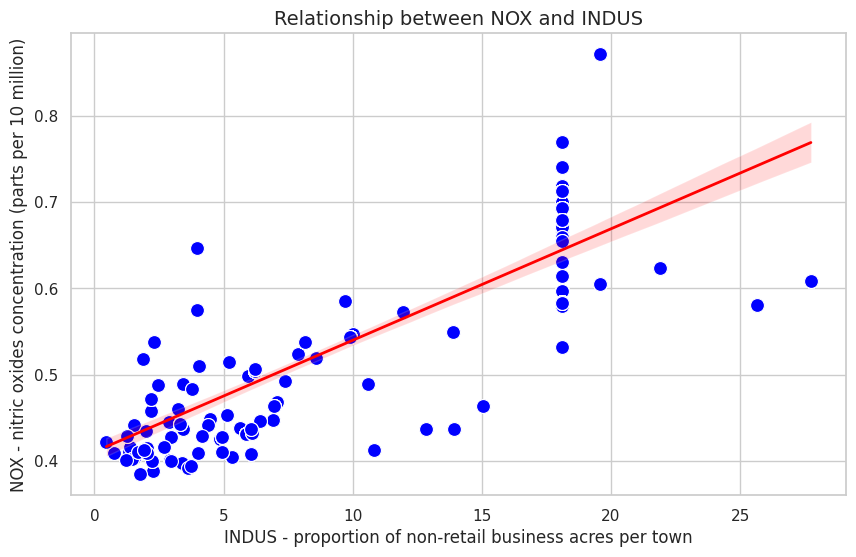

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='blue', s=100)
sns.regplot(x='INDUS', y='NOX', data=boston_df, scatter=False, color='red', line_kws={"linewidth": 2})
plt.title("Relationship between NOX and INDUS", fontsize=14)
plt.xlabel("INDUS - proportion of non-retail business acres per town", fontsize=12)
plt.ylabel("NOX - nitric oxides concentration (parts per 10 million)", fontsize=12)
plt.show()

**the upward sloping trendline indicates that industrial areas contribute to higher pollution levels**

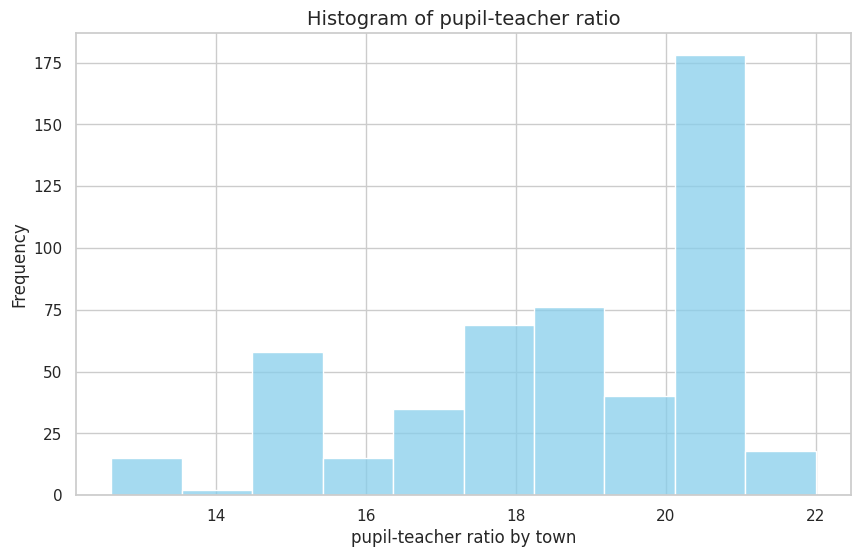

In [11]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], kde=False, bins=10, color='skyblue')
plt.title("Histogram of pupil-teacher ratio", fontsize=14)
plt.xlabel("pupil-teacher ratio by town", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [12]:
# Separate the data based on CHAS
group1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2 = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform independent t-test
t_stat, p_value = stats.ttest_ind(group1, group2)
alpha = 0.05
if p_value < alpha:
    print("YES, there is a significant difference in median values (reject the null hypothesis)")
else:
    print("NO, there is no significant difference (failure to reject the null hypothesis)")

YES, there is a significant difference in median values (reject the null hypothesis)


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [13]:
# Discretize AGE into groups
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['<=35', '36-70', '70+'])

# Perform ANOVA
model = ols('MEDV ~ AGE_Group', data=boston_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
alpha = 0.05
if anova_table['PR(>F)'].iloc[0] < alpha:
    print("YES, there is a significant difference in MEDV across AGE groups (reject the null hypothesis).")
else:
    print("NO, there is no significant difference in MEDV across AGE groups (failure to reject the null hypothesis).")

YES, there is a significant difference in MEDV across AGE groups (reject the null hypothesis).


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [17]:
# Pearson Correlation
corr, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

alpha = 0.05
if p_value < alpha:
    print("NO we can't. There is in fact a significant relationship between NOX and INDUS (reject the null hypothesis).")
else:
    print("YES, there is no significant relationship between NOX and INDUS (failure to reject the null hypothesis).")

NO we can't. There is in fact a significant relationship between NOX and INDUS (reject the null hypothesis).


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [18]:
# Independent variable (Distance to employment centers)
X = boston_df['DIS']
# Dependent variable (Median value of owner-occupied homes)
y = boston_df['MEDV']
# Add constant for the intercept term
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

# Conclusion
alpha = 0.05
if model.pvalues.iloc[1] < alpha:
    print("\nThe weighted distance significantly impacts MEDV (reject the null hypothesis).")
    print("An increase in the weighted distance to the employment centers is associated with an increase in the median home value.")
else:
    print("\nThe weighted distance does not significantly impact MEDV (failure to reject the null hypothesis).")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 12 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        22:18:15   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0